In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.time import Time

In [3]:
GPlist = np.loadtxt('./data/giant_pulses.txt', dtype='string').T
#GPlist = np.loadtxt('./data/pulses_vlowSN.txt', dtype='string').T

In [4]:
Times = Time(GPlist[0], format='isot', scale='utc')
SN = GPlist[1].astype(float)
phase = GPlist[2].astype(float)

In [5]:
Tsort = np.argsort(Times.unix)
SNsort = np.argsort(SN)

In [6]:
ts = Times[Tsort]
t = ts.unix - ts.unix[0]
sn = SN[Tsort]
p = phase[Tsort]

In [7]:
#Adjust the phases to match
p_test = 1. * p
p_test[t < 7000] += 0.22
p_test[t > 7000] += 0.312
p_test[t > 19000] -= 0.2555
p_test[t > 24500] += 0.0865
p_test[t > 32000] += 0.172
p_test[t > 41500] -= 0.178
p_test = p_test % 1
pcorr = p_test

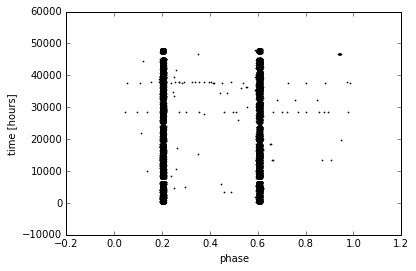

In [8]:
%matplotlib inline
plt.scatter(pcorr[sn > 5], t[sn > 5], s=0.5)
plt.xlabel('phase')
plt.ylabel('time [hours]')

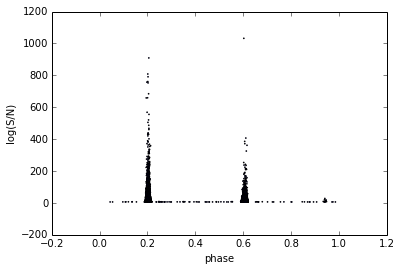

In [9]:
plt.scatter(pcorr, sn, s=0.5)
plt.xlabel('phase')
plt.ylabel('log(S/N)')

In [23]:
#output a new giant pulse list
print(len(pcorr))
#f = open('gp_SNsorted.txt','w')
#for i in xrange(len(pcorr)):
#    f.write('{0} {1} {2} \n'.format(ts[i], sn[i], pcorr[i]))

113788


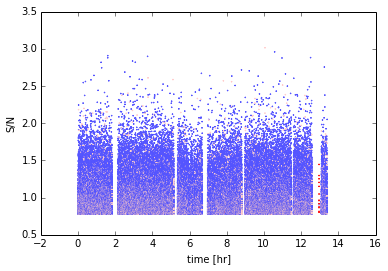

In [10]:
#Flux distribution
plt.clf()
plt.scatter(t / 3600., np.log10(sn), marker='x', s=1, c=pcorr, cmap=cm.bwr)
plt.xlabel('time [hr]')
plt.ylabel('S/N')

In [11]:
#Separate Main and Interpulse
mp_t = t[abs(pcorr-0.2) < 0.04]
mp_p = pcorr[abs(pcorr-0.2) < 0.04]
mp_sn = sn[abs(pcorr-0.2) < 0.04]
ip_t = t[abs(pcorr-0.6) < 0.04]
ip_p = pcorr[abs(pcorr-0.6) < 0.04]
ip_sn = sn[abs(pcorr-0.6) < 0.04]


In [26]:
mp_x = np.histogram(np.log10(mp_sn), bins=np.linspace(0.77,3.2,40))[0]
ip_x = np.histogram(np.log10(ip_sn), bins=np.linspace(0.77,3.2,40))[0]

In [27]:
%matplotlib qt
plt.plot(10**(np.linspace(0.77,3.2,39)),mp_x,'bx', label='main pulse')
plt.plot(10**(np.linspace(0.77,3.2,39)),ip_x,'r+', label='interpulse')
plt.xlabel('S/N')
plt.ylabel('N pulse')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim(1e-1,1e5)

(0.1, 100000.0)

In [65]:
y = np.log10(ip_x)[0:29]
x = np.linspace(0.1,3.2,30)[0:29]
from scipy.optimize import curve_fit
def line(x, m, b):
    return m*x+b

A,B = curve_fit(line,x,y)[0]

In [66]:
y2 = np.log10(mp_x)[10:-1]
x2 = np.linspace(0.77,3,39)[10:-1]

A2,B2 = curve_fit(line,x2,y2)[0]

ERROR:astropy:ValueError: operands could not be broadcast together with shapes (26,) (17,) 


ValueError: operands could not be broadcast together with shapes (26,) (17,) 

ERROR: ValueError: operands could not be broadcast together with shapes (26,) (17,)  [scipy.optimize.minpack]


In [12]:
y3 = np.log10(mp_x)[0:10]
x3 = np.linspace(0.77,3,39)[0:10]

A3,B3 = curve_fit(line,x3,y3)[0]

ERROR: NameError: name 'mp_x' is not defined [IPython.core.interactiveshell]


NameError: name 'mp_x' is not defined

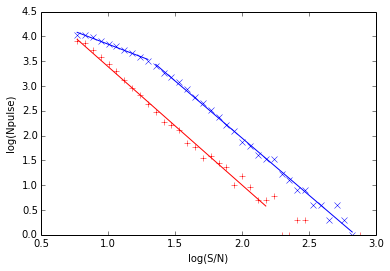

In [31]:
plt.clf()
#plt.plot(x,y,'r+')
plt.plot(np.linspace(0.77,3,39),np.log10(ip_x),'r+')
plt.plot(x,line(x,A,B),'r')

plt.plot(x2,y2,'bx')
plt.plot(x2,line(x2,A2,B2))

plt.plot(x3,y3,'bx')
plt.plot(x3,line(x3,A3,B3),'b')

plt.xlabel('log(S/N)')
plt.ylabel('log(Npulse)')

-c:10: RuntimeWarning: divide by zero encountered in log10
-c:11: RuntimeWarning: divide by zero encountered in log10


(-1, 6)

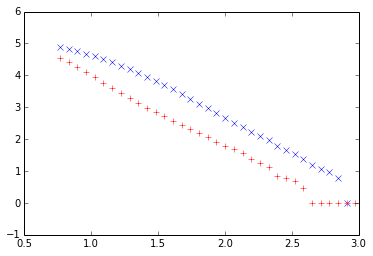

In [32]:
x2 = np.linspace(0.77,3.3,40)
ipcdf = []
mpcdf = []
for N in x2:
    temp = ip_sn[ip_sn > 10**(N)]
    ipcdf.append(temp.shape)
    temp = mp_sn[mp_sn > 10**(N)]
    mpcdf.append(temp.shape)
    
plt.plot(x2, np.log10(mpcdf), 'bx')
plt.plot(x2, np.log10(ipcdf), 'r+')
plt.ylim(-1,6)


In [41]:
print len(ip_t)
print len(mp_t)
print len(ip_t) + len(mp_t)

33904
79795
113699


In [113]:
dt = abs(t[0:-1] - t[1:])
dsn = sn[0:-1] - sn[1:]
print max(dt)

1353.4519999


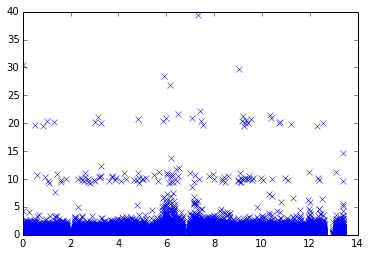

In [109]:
%matplotlib inline
plt.plot(t[0:-1][dt<60]/3600, dt[dt<60], 'bx')

In [118]:
%matplotlib qt
plt.plot(dt[dt<60], np.sqrt(abs(dsn[dt<60])), 'bx')
plt.xscale('log')

133


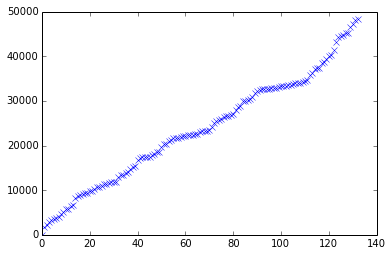

In [44]:
tbad = t[0:-1][dt>9]
print len(tbad)
Time_bad = Time(tbad + ts.unix[0], format='unix', scale='utc')
plt.plot(Time_bad.unix-Time_bad.unix[0],'bx')

In [45]:
ipargs = np.argsort(ip_sn)
Time(ip_t[ipargs]+ts.unix[0],format='unix',scale='utc')[-1].isot

'2015-07-24T18:05:46.141'

In [28]:

%matplotlib qt
plt.hist(mp_p[mp_t < 7000],bins = np.linspace(0.185, 0.225, 40), normed=1, alpha=0.5)
plt.hist(mp_p[abs(mp_t -28250) < 3750],bins = np.linspace(0.185, 0.225, 40), normed=1, alpha=0.5)
plt.hist(mp_p[mp_t > 41500],bins = np.linspace(0.185, 0.225, 40), normed=1, alpha=0.5)


(array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.53778268,
          2.15113072,    5.91560949,    9.03474903,   18.82239382,
         28.17981247,   42.80750138,   61.09211252,   77.76337562,
         92.283508  ,   99.48979592,  104.43739658,  102.716492  ,
         91.31549917,   76.58025372,   55.0689465 ,   44.74351903,
         26.35135135,   19.14506343,    9.35741864,    4.94760066,
          1.50579151,    0.64533922,    0.10755654,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ]),
 array([ 0.185     ,  0.18602564,  0.18705128,  0.18807692,  0.18910256,
        0.19012821,  0.19115385,  0.19217949,  0.19320513,  0.19423077,
        0.19525641,  0.19628205,  0.19730769,  0.19833333,  0.19935897,
        0.20038462,  0.20141026,  0.2024359 ,  0.20346154,  0.20448718,
        0.20551282,  0.20653846,  0.2075641 ,  0.2085

In [67]:
MPbins = np.linspace(0.162, 0.242, 80)
MPfmean = []
MPfmedian = []

for i in xrange(len(MPbins) - 1):
    mid = (MPbins[i] + MPbins[i+1]) / 2
    ran = (MPbins[i+1] - MPbins[i]) / 2
    MPs = mp_sn[abs(mp_p - mid) < ran]
    #MPs = MPs[MPs > 10]
    MPfmean.append(np.mean(MPs))
    MPfmedian.append(np.median(MPs))
    
IPbins = np.linspace(0.568, 0.648, 80)
IPfmean = []
IPfmedian = []

for i in xrange(len(IPbins) - 1):
    mid = (IPbins[i] + IPbins[i+1]) / 2
    ran = (IPbins[i+1] - IPbins[i]) / 2
    IPs = ip_sn[abs(ip_p - mid) < ran]
    #IPs = IPs[IPs > 10]
    IPfmean.append(np.mean(IPs)) 
    IPfmedian.append(np.median(IPs)) 

/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:67: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [68]:
%matplotlib qt
plt.plot(MPbins[:-1], MPfmean, 'b')
plt.plot(MPbins[:-1], MPfmedian, 'r')
plt.plot(IPbins[:-1], IPfmean, 'b')
plt.plot(IPbins[:-1], IPfmedian, 'r')


In [34]:
MPbins = np.linspace(0.162, 0.242, 80)
MPfmean = []
MPfmedian = []
MPindmean = []
MPinderr = []
MPindmedian = []
#MPindex = np.array(MPindex)
MPcount = []
MPsum = []
MPSN = 1.*mp_sn
MPphase = 1.*mp_p

for i in xrange(len(MPbins) - 1):
    mid = (MPbins[i] + MPbins[i+1]) / 2
    ran = (MPbins[i+1] - MPbins[i]) / 2
    MPtemp = MPSN[abs(MPphase - mid) < ran]
    #MPsind = MPindex[abs(MPphase - mid) < ran]
    #MPs = MPs[MPs > 10]
    MPfmean.append(np.mean(MPtemp))
    MPfmedian.append(np.median(MPtemp))
    #MPindmean.append(np.mean(MPsind[~np.isnan(MPsind)]))
    #MPindmedian.append(np.median(MPsind[~np.isnan(MPsind)]))
    #MPinderr.append(np.std(MPsind[~np.isnan(MPsind)]) / np.sqrt(len(MPsind[~np.isnan(MPsind)]) - 1) )
    MPcount.append(len(MPtemp))
    MPsum.append(np.sum(MPtemp))
    
IPbins = np.linspace(0.568, 0.648, 80)
IPfmean = []
IPfmedian = []
IPindmean = []
IPinderr = []
IPindmedian = []
#IPindex = np.array(IPindex)
IPcount = []
IPsum = []
IPSN = 1.*ip_sn
IPphase = 1.*ip_p

for i in xrange(len(IPbins) - 1):
    mid = (IPbins[i] + IPbins[i+1]) / 2
    ran = (IPbins[i+1] - IPbins[i]) / 2
    IPtemp = IPSN[abs(IPphase - mid) < ran]
    #IPsind = IPindex[abs(IPphase - mid) < ran]
    #MPs = MPs[MPs > 10]
    IPfmean.append(np.mean(IPtemp))
    IPfmedian.append(np.median(IPtemp))
    #IPindmean.append(np.mean(IPsind[~np.isnan(IPsind)]))
    #IPindmedian.append(np.median(IPsind[~np.isnan(IPsind)]))
    #IPinderr.append(np.std(IPsind[~np.isnan(IPsind)]) / np.sqrt(len(IPsind[~np.isnan(IPsind)]) - 1) )
    IPcount.append(len(IPtemp))
    IPsum.append(np.sum(IPtemp))

/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:67: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [35]:
%matplotlib qt

plt.subplot(211)
plt.plot(MPbins[:-1], MPfmedian)
plt.plot(MPbins[:-1], MPfmean)
plt.xlim(0.18,0.22)
plt.ylabel('S / N')


plt.subplot(212)
plt.plot(MPbins[:-1], MPcount)
plt.plot(MPbins[:-1], MPsum / np.mean(MPSN))
plt.xlim(0.18,0.22)
plt.ylabel('log(N) Pulses')
plt.xlabel('Phase')

In [36]:
%matplotlib qt

plt.subplot(211)
plt.plot(IPbins[:-1], IPfmedian)
plt.plot(IPbins[:-1], IPfmean)
plt.xlim(0.585,0.625)
plt.ylabel('S / N')


plt.subplot(212)
plt.plot(IPbins[:-1], IPcount)
plt.plot(IPbins[:-1], IPsum / np.mean(IPSN))
plt.xlim(0.585,0.625)
plt.ylabel('log(N) Pulses')
plt.xlabel('Phase')

(0.1, 100000.0)

In [37]:
'''
Re-make histograms, with false detections statistically removed
Necessary for low S/N
'''
binrange=[0.1,3.2]

sn_bins = np.linspace(binrange[0],binrange[1],161)
falsedet = []
off1 = sn[abs(pcorr - 0.4) < 0.15] 
off2 = sn[abs(pcorr - 0.8) < 0.15]

for i in xrange(len(sn_bins) -1):
    mid = ( 10**(sn_bins[i]) + 10**(sn_bins[1+i]) ) / 2.
    ran = ( -10**(sn_bins[i]) + 10**(sn_bins[1+i]) ) / 2.
    offbin1 = off1[abs(off1 - mid) < ran]
    offbin2 = off2[abs(off2 - mid) < ran]
    falsedet.append(len(offbin1) + len(offbin2))
    
falsedet = np.array(falsedet)
falsedet /= (0.6 / 0.08)

In [40]:
mp_x = np.histogram(np.log10(mp_sn), bins=np.linspace(binrange[0],binrange[1],161))[0]
ip_x = np.histogram(np.log10(ip_sn), bins=np.linspace(binrange[0],binrange[1],161))[0]

%matplotlib qt
plt.plot(10**(np.linspace(binrange[0],binrange[1],160)),mp_x - falsedet,'bx', label='main pulse')
plt.plot(10**(np.linspace(binrange[0],binrange[1],160)),ip_x - falsedet,'r+', label='interpulse')
plt.plot(10**(np.linspace(binrange[0],binrange[1],160)),falsedet,'kx', label='background detections')

plt.xlabel('S/N')
plt.ylabel('N pulse')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim(1e-1,1e5)
plt.xlim(2, 10**3.5)

(2, 3162.2776601683795)

In [41]:
x2 = 1.*sn_bins
ipcdf = []
mpcdf = []
for N in x2:
    temp = ip_sn[ip_sn > 10**(N)]
    ipcdf.append(temp.shape)
    temp = mp_sn[mp_sn > 10**(N)]
    mpcdf.append(temp.shape)

%matplotlib qt
plt.plot(x2, np.log10(mpcdf), 'bx')
plt.plot(x2, np.log10(ipcdf), 'r+')
plt.ylim(-1,6)
plt.xlim(0.1,3.5)
plt.xlabel('S/N')
plt.ylabel('N pulse')

In [42]:
'''Test, look at precursor'''
pre_t = t[abs(pcorr-0.145) < 0.02]
pre_p = pcorr[abs(pcorr-0.145) < 0.02]
pre_sn = sn[abs(pcorr-0.145) < 0.02]

pre2_t = t[abs(pcorr-0.845) < 0.02]
pre2_p = pcorr[abs(pcorr-0.845) < 0.02]
pre2_sn = sn[abs(pcorr-0.845) < 0.02]

In [43]:
pre_x = np.histogram(np.log10(pre_sn), bins=np.linspace(binrange[0],binrange[1],161))[0]
pre2_x = np.histogram(np.log10(pre2_sn), bins=np.linspace(binrange[0],binrange[1],161))[0]


%matplotlib qt
plt.plot(10**(np.linspace(binrange[0],binrange[1],160)),pre_x - falsedet/2.,'bx', label='precursor')
plt.plot(10**(np.linspace(binrange[0],binrange[1],160)),pre2_x - falsedet/2.,'r+', label='background gate')
plt.plot(10**(np.linspace(binrange[0],binrange[1],160)),falsedet/2.,'kx', label='background detections')
plt.axhline(0)
#plt.plot(10**(np.linspace(0.2,3.2,160)),falsedet,'kx', label='background detections')
#plt.yscale('log')
plt.xlabel('S / N')
plt.ylabel('N pulses')
plt.xlim(2.0,5.5)
plt.legend()


In [31]:
%matplotlib qt
plt.plot(10**(np.linspace( 0.2,3.2,160)),pre_x,'b', label='pre + bg')
plt.plot(10**(np.linspace(0.2,3.2,160)),falsedet/2.,'r', label='bg')
plt.plot(10**(np.linspace(0.2,3.2,160)),pre_x - falsedet/2.,'k', label='pre - bg')
plt.axhline(0)
#plt.plot(10**(np.linspace(0.2,3.2,160)),falsedet,'kx', label='background detections')
#plt.yscale('log')
plt.xlim(2.0,5.5)
plt.xlabel('S / N')
plt.ylabel('N pulses')
plt.legend()

In [45]:
%matplotlib qt
pbin = np.linspace(0,1,250)

sumphasebins = []

for i in xrange(len(pbin)-1):
    b = sn[abs(pcorr - (pbin[i] + pbin[i+1])/2) < 0.002]
    sumphasebins.append(np.sum(b))
    
plt.plot(pbin[:-1], sumphasebins)

In [16]:
%matplotlib qt

tspec = 1.*t
ft = np.fft.rfft(sn)

plt.plot(abs(ft), 'bx')

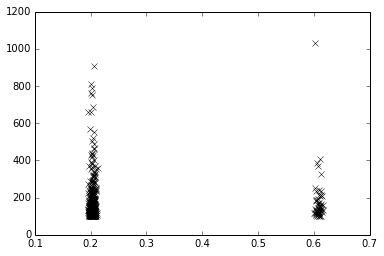

In [13]:
"""
Sort by brightness to search for pulse pairs

DO NOT do if continuing analysis above, this overwrites crucial variables
"""

%matplotlib inline
MPSN_cut = 100
IPSN_cut = 100

Times = ts
phase = 1.*pcorr
SN = 1.*sn

MPTimes = Times[abs(phase-0.2) < 0.05] #main pulse
IPTimes = Times[abs(phase-0.6) < 0.05] #interpulse
MPSN = SN[abs(phase-0.2) < 0.05] #main pulse
IPSN = SN[abs(phase-0.6) < 0.05] #interpulse
MPphase = phase[abs(phase-0.2) < 0.05]
IPphase = phase[abs(phase-0.6) < 0.05]

MPTimes = MPTimes[MPSN > MPSN_cut] #Only take high S/N pulses
MPdT = MPTimes[1:].unix - MPTimes[:-1].unix
MPTimes = MPTimes[1:][MPdT > 0.0]
MPphase = MPphase[MPSN > MPSN_cut]
MPphase = MPphase[1:][MPdT > 0.0]
MPSN = MPSN[MPSN > MPSN_cut]
MPSN = MPSN[1:][MPdT > 0.0]
MPdT = MPdT[MPdT > 0.0]

IPTimes = IPTimes[IPSN > IPSN_cut] #Only take high S/N pulses
IPdT = IPTimes[1:].unix - IPTimes[:-1].unix
IPTimes = IPTimes[1:][IPdT > 0.0]
IPphase = IPphase[IPSN > IPSN_cut]
IPphase = IPphase[1:][IPdT > 0.0]
IPSN = IPSN[IPSN > IPSN_cut]
IPSN = IPSN[1:][IPdT > 0.0]
IPdT = IPdT[IPdT > 0.0]

plt.plot(MPphase, MPSN, 'kx')
plt.plot(IPphase, IPSN, 'kx')

In [29]:
CheckT = Times[SN > 60]
CheckP = phase[SN > 60]
CheckdT = CheckT[1:].unix - CheckT[:-1].unix
CheckdP = CheckP[1:] - CheckP[:-1]
CheckT = CheckT[1:][CheckdT > 2e-3]
CheckdP = CheckdP[CheckdT > 2e-3]
CheckdT = CheckdT[CheckdT > 2e-3]

nP = 300

print CheckT[ np.argsort(CheckdT)[0:nP] ]
print CheckT[ np.argsort(CheckdT)[0:nP] -1]

print np.sort(CheckdT)[:nP]
print CheckdP[ np.argsort(CheckdT)[0:nP] ]
a = CheckT[ np.argsort(CheckdT)[0:nP] ]
b = CheckT[ np.argsort(CheckdT)[0:nP] -1]

outfile = open('pulsepairs2.txt', 'w')
for i in range(nP):
    outfile.write('%s \n' % (a[i].isot))
    outfile.write('%s \n' % (b[i].isot))

['2015-07-24T08:44:29.906' '2015-07-24T11:00:31.927'
 '2015-07-24T18:02:47.197' '2015-07-24T18:59:59.623'
 '2015-07-24T20:15:55.401' '2015-07-24T16:17:39.498'
 '2015-07-24T17:33:11.793' '2015-07-24T16:41:06.570'
 '2015-07-24T12:50:39.841' '2015-07-24T09:09:50.847'
 '2015-07-24T16:29:22.478' '2015-07-24T17:47:58.255'
 '2015-07-24T09:33:39.761' '2015-07-24T10:33:43.645'
 '2015-07-24T08:16:52.914' '2015-07-24T13:07:30.083'
 '2015-07-24T11:42:48.908' '2015-07-24T10:45:47.692'
 '2015-07-24T16:42:42.891' '2015-07-24T12:44:14.103'
 '2015-07-24T18:38:14.475' '2015-07-24T17:04:09.480'
 '2015-07-24T16:13:46.092' '2015-07-24T19:05:49.144'
 '2015-07-24T12:00:08.072' '2015-07-24T12:28:27.202'
 '2015-07-24T19:11:55.096' '2015-07-24T11:25:30.653'
 '2015-07-24T17:49:48.370' '2015-07-24T08:19:02.393'
 '2015-07-24T08:44:45.278' '2015-07-24T20:23:01.591'
 '2015-07-24T12:37:40.511' '2015-07-24T19:58:53.191'
 '2015-07-24T09:28:30.981' '2015-07-24T09:04:51.068'
 '2015-07-24T09:12:43.676' '2015-07-24T12:30:5